<a href="https://colab.research.google.com/github/6760525/DST-84_PROJECT-4/blob/main/Project_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [ ]:
df = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/dab91dc74eb3cb684755123d224d262b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/bank_fin.zip', sep = ';')

In [ ]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
mn = (None, 0)
for col in df.columns:
  n = df[col].isnull().sum()
  if n > 0: print(f'В колонке {col} отсутствует {n} значений')
  if (n > mn[1]): mn = (col, n)

if mn[0] != None:
  print(f"\nБольше всего пропусков ({mn[1]}) в колонке '{mn[0]}'")
else:
  print("\nПропусков нет")

В колонке balance отсутствует 25 значений

Больше всего пропусков (25) в колонке 'balance'


### **Ответ:**
Пропущенные значения есть в колонке balance, в количестве 25 штук

### Задание 2

In [ ]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
df.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### **Ответ:**
Пропущенные значенияв в признаке job обозначены специальным словом *unknown*

### Задание 3

In [ ]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.replace(' ', '').str.replace('$', '').str.replace(',', '.').astype('float')
print(f'Среднее значение по преобразованному в корректный вид признаку balance: {round(df.balance.mean(), 3)}')

Среднее значение по преобразованному в корректный вид признаку balance: 1529.129


### **Ответ:**
Среднее значение по преобразованному в корректный вид признаку balance: 1529.129

### Задание 4

In [ ]:
# обработайте пропуски в признаки balance, заменив их на медианные значения по данному признаку

med = df.balance.dropna().median()
print(f'Среднее значение по признаку balance: {round(df.balance.fillna(med).mean(), 3)}')
print(f'Медианное значение по признаку balance: {round(df.balance.fillna(med).median(), 3)}')

Среднее значение по признаку balance: 1526.936
Медианное значение по признаку balance: 550.0


In [ ]:
df.balance = df.balance.fillna(med)

### **Ответ:**
Среднее значение по преобразованному в корректный вид признаку balance: 1526.936

### Задание 5

In [ ]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
job_mode = df.job.mode()[0]
df.loc[df.job=='unknown', 'job'] = job_mode
df.job.value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [ ]:
education_mode = df.education.mode()[0]
df.loc[df.education=='unknown', 'education'] = education_mode
df.education.value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [ ]:
bal = df.loc[(df['job'] == job_mode) & (df['education'] == education_mode)].balance.mean()
print(f'После замены пропусков средний доход для клиентов с самой популярной работой и самым популярным уровнем образования составляет {round(bal, 3)}');

После замены пропусков средний доход для клиентов с самой популярной работой и самым популярным уровнем образования составляет 1598.883


### **Ответ:**
Cредний доход для клиентов с самой популярной работой и самым популярным уровнем образования после замены пропусков составляет: 1598.883

### Задание 6

In [ ]:
# удалите все выбросы для признака balance
# ваш код

q1 = df.balance.quantile(0.25)
q3 = df.balance.quantile(0.75)
iqr = q3 - q1
outliers_boundary = ((q1 - 1.5 * iqr).astype('int'), (q3 + 1.5 * iqr).astype('int'))

print(f'Границы межквартильного размаха: {outliers_boundary}')
# так в задании!


Границы межквартильного размаха: (-2241, 4063)


In [ ]:
df = df[(df.balance >= outliers_boundary[0]) & (df.balance <= outliers_boundary[1])]
print(f'После удаления всех выбросов осталось {df.shape[0]} объектов')

После удаления всех выбросов осталось 10105 объектов


## Часть 2:  Разведывательный анализ

### Задание 1

In [ ]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
df.deposit.value_counts()

no     5424
yes    4681
Name: deposit, dtype: int64

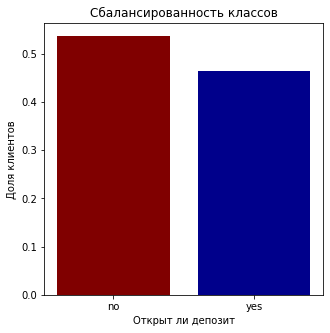

In [ ]:
dep = df.deposit.value_counts(normalize=True)
fig = plt.figure(figsize = (5, 5))

plt.bar(dep.index, dep.values, color=('maroon', 'darkblue'), width = 0.8)
plt.xlabel("Открыт ли депозит")
plt.ylabel("Доля клиентов")
plt.title("Сбалансированность классов")
plt.show()

### **Ответ:**
Соотношение классов в данных несбалансированно

### Задание 2

In [ ]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### **Ответ:**
* Максимальный возраст клиента банка: 95
* Минимальная продолжительность разговора с клиентом банка: 2

Дополнительно:
* **pdays** (количество пропущенных дней с момента последней маркетинговой кампании до контакта в текущей кампании) - значение -1 может быть ошибкой, или отдельной категорией;
* **campaign** (количество контактов с этим клиентом в течение текущей кампании) - возможно имеет смысл преобразовать в категорию;
* **day** (день, в который был последний контакт) - объединить с месяцем в дату, возможно добавить день недели

### Задание 3

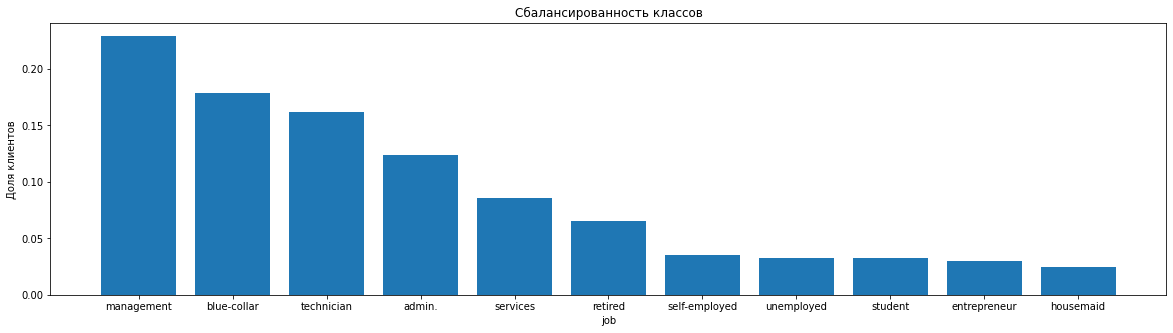

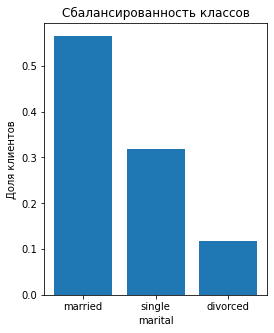

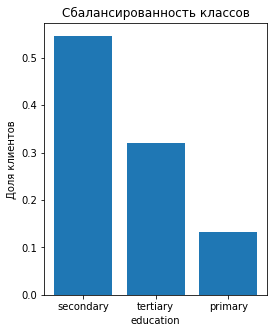

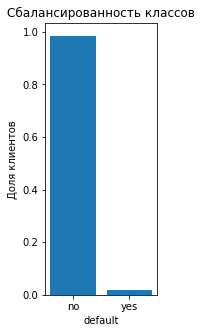

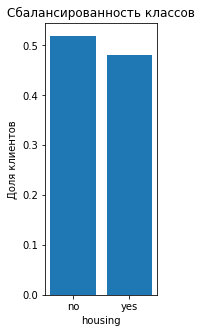

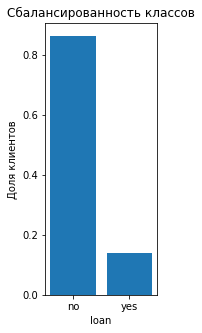

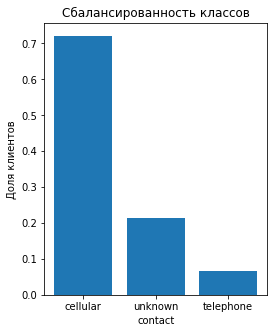

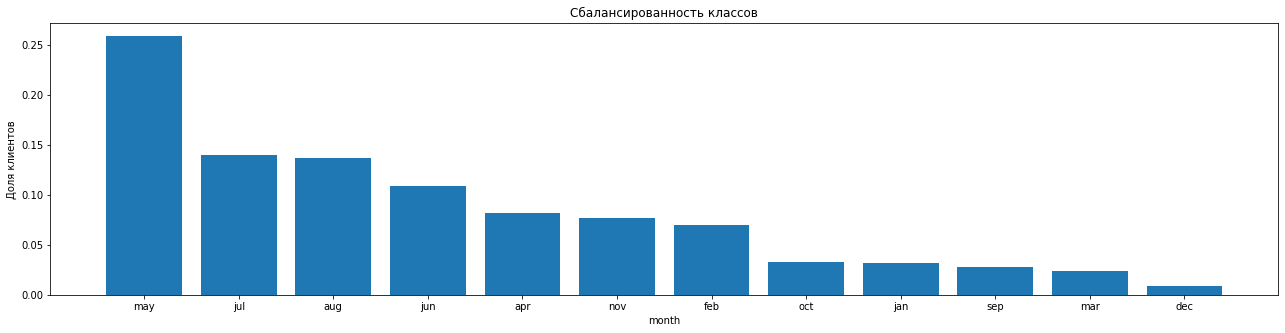

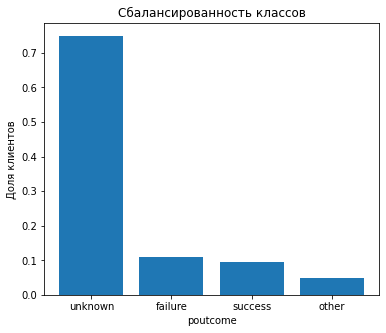

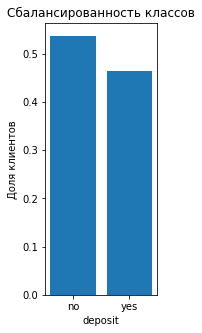

In [ ]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#постройте визуализации, иллюстрирующие результаты

for col in df.columns[df.dtypes=='object']:
  dep = df[col].value_counts(normalize=True)
  fig = plt.figure(figsize = (2 * (len(dep)-1), 5))

  plt.bar(dep.index, dep.values)
  plt.xlabel(col)
  plt.ylabel("Доля клиентов")
  plt.title("Сбалансированность классов")

plt.show()

### **Ответ:**
* Макретинговая кампания проводилась 12 месяцев
* Наибольшее количество клиентов участвовало в кампании в мае
* Среди клиентов банка представлено 11 сфер занятости
* Доля клиентов с просроченным кредитом крайне мала
* Около половины клиентов имеют кредит на жильё
* Доля клиентов с кредитом на личные нужны составляет около 15%
* 70% клиентов предпочли использование мобильного телефона для контактов
* Результат предыдущей макретинговой кампании для большинства клиентов неизвестен. Доли успеха и провала среди оставшихся сопоставим

### Задание 4

In [ ]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
round(100 * df.pivot_table(index='poutcome', columns='deposit', values='balance', aggfunc='count').div(df.groupby('poutcome')['balance'].count(), axis=0), 2)

deposit,no,yes
poutcome,,
failure,50.68,49.32
other,44.91,55.09
success,8.89,91.11
unknown,60.26,39.74


### **Ответ:**

В текущей кампании успехов больше, чем неудач у тех клиентов, у которых статус предыдущей *success*

### Задание 5

In [ ]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
round(100 * df.pivot_table(index='month', columns='deposit', values='balance', aggfunc='count').div(df.groupby('month')['balance'].count(), axis=0), 2).sort_values(by='yes')

deposit,no,yes
month,,
may,67.86,32.14
jan,60.82,39.18
jul,58.96,41.04
nov,58.46,41.54
aug,55.96,44.04
jun,54.89,45.11
feb,45.56,54.44
apr,38.19,61.81
oct,18.51,81.49


### **Ответ:**

Самый большой процент неудач при взаимодействии в текущей маркетинговой кампании был в мае

**NB**: В мае так же было наибольшее абсолютное количество участников, т.е. результат, количество тех, кто открыл счёт по итогу майской кампании может оказаться максимальным

### Задание 6

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def ag(age):
  if (age < 30): return '<30'
  elif (age < 40): return '30-40'
  elif (age < 50): return '40-50'
  elif (age < 60): return '50-60'
  else: return '60+'

df['age_group'] = df.age.map(ag)

In [ ]:
round(100 * df.pivot_table(index='age_group', columns='deposit', values='balance', aggfunc='count').div(df.groupby('age_group')['balance'].count(), axis=0), 2).sort_values(by='no')

deposit,no,yes
age_group,,
60+,24.04,75.96
<30,40.82,59.18
30-40,56.68,43.32
50-60,59.49,40.51
40-50,60.62,39.38


### **Ответ:**

Две возрастные группы, которые более склонны открывать депозит, чем отказываться от открытия депозита в банке после рекламного предложения: до 30 и 60 и старше

### Задание 7

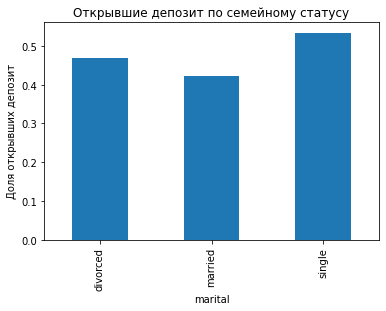

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
df['coutcome'] = df.deposit.apply(lambda x: 1 if x == 'yes' else 0)
df.groupby('marital')['coutcome'].mean().plot(kind='bar', ylabel='Доля открывших депозит', title='Открывшие депозит по семейному статусу');

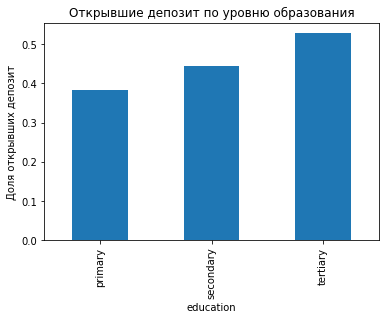

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
df.groupby('education')['coutcome'].mean().plot(kind='bar', ylabel='Доля открывших депозит', title='Открывшие депозит по уровню образования');

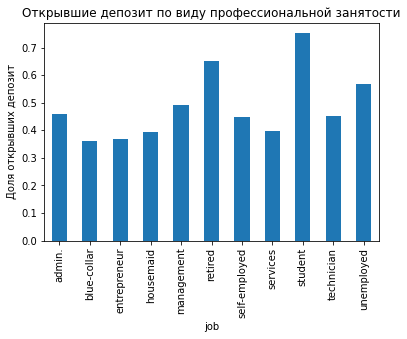

In [ ]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
df.groupby('job')['coutcome'].mean().plot(kind='bar', ylabel='Доля открывших депозит', title='Открывшие депозит по виду профессиональной занятости');

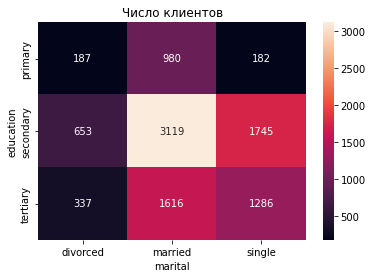

In [ ]:
sns.heatmap(df.pivot_table(index='education', columns='marital', values='coutcome', aggfunc='count'), annot=True, fmt="n").set(title="Число клиентов");

### **Ответ:**

* Наибольшее число клиентов банка занято в сфере *management*
* При семейном положении *single* есть тенденция открывать депозит, а не отказываться от его открытия
* Самым многочисленным является пересечение категорий *married* и *secondary* - женатые и замужние с уровнем образования *secondary*

### Задание 8

In [ ]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
tmp = df.pivot_table(index='education', columns='marital', values='coutcome', aggfunc='mean')
round(100 * tmp, 3)

marital,divorced,married,single
education,,,
primary,51.337,34.592,45.055
secondary,43.338,41.327,50.372
tertiary,51.632,48.515,58.709


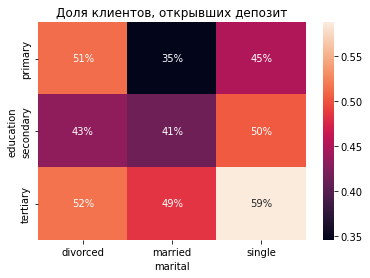

In [ ]:
sns.heatmap(tmp, annot=True, fmt=".0%").set(title="Доля клиентов, открывших депозит");

In [ ]:
tmp = df.pivot_table(index='education', columns='marital', values='coutcome', aggfunc='sum')
tmp

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


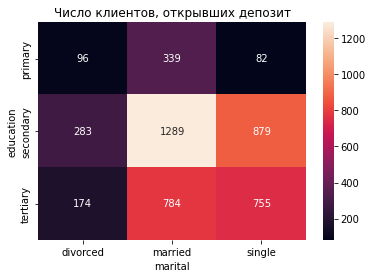

In [ ]:
sns.heatmap(tmp, annot=True, fmt="n").set(title="Число клиентов, открывших депозит");

### **Ответ:**

* Среди тех, кто открыл депозит, наибольшая доля в группе одиноких с третьим образованием
* Среди тех, кто открыл депозит, наиболее многочисленная группа женатых и замужних с уровнем образования *secondary*

## Часть 3: преобразование данных

### Задание 1

In [ ]:
# преобразуйте уровни образования
df['education'] = LabelEncoder().fit_transform(df.education)

In [ ]:
df.education.sum()

11995

### **Ответ:**
Уровни образования преобразованы

### Задание 2

In [ ]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def agi(age):
  if (age < 30): return 0
  elif (age < 40): return 1
  elif (age < 50): return 2
  elif (age < 60): return 3
  else: return 4

df['age'] = df.age.map(agi)
#df['age_group'] = LabelEncoder().fit_transform(df.age_group)
df = df.drop(['coutcome', 'age_group'], axis=1)

In [ ]:
# преобразуйте бинарные переменные в представление из нулей и единиц

df['deposit'] = LabelEncoder().fit_transform(df.deposit)
df['default'] = LabelEncoder().fit_transform(df.default)
df['housing'] = LabelEncoder().fit_transform(df.housing)
df['loan'] = LabelEncoder().fit_transform(df.loan)

In [ ]:
print(f'std(deposit) = {round(df.deposit.std(), 3)}')

std(deposit) = 0.499


In [ ]:
round(df[['default','housing','loan']].mean(),3)

default    0.016
housing    0.481
loan       0.138
dtype: float64

In [ ]:
round(df[['default','housing','loan']].mean().sum(),3)

0.635

In [ ]:
xx = pd.read_csv('https://lms.skillfactory.ru/assets/courseware/v1/dab91dc74eb3cb684755123d224d262b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/bank_fin.zip', sep = ';')

round(sum([xx.default.apply(lambda x: 1 if x == 'yes' else 0).mean(),
           xx.housing.apply(lambda x: 1 if x == 'yes' else 0).mean(),
           xx.loan.apply(lambda x: 1 if x == 'yes' else 0).mean()]), 3)

0.619

### **Ответ:**
* Бинарные признаки default, loan, housing и deposit, а также порядковая переменная для возраста преобразованы
* Стандартное отклонение по преобразованной в корректный вид целевой переменной deposit составляет 0.499
* Сумма трёх средних арифметических каждой из получившихся переменных равны 0.635 для данных очищенных от выбросов, для начального датасета - 0.619

### Задание 3

In [ ]:
# создайте дамми-переменные
df = pd.get_dummies(df, columns=['job', 'marital', 'contact', 'month', 'poutcome']) #, 'age', 'education'])
df.shape

(10105, 45)

### **Ответ:**
* Не понимаю, откуда в ответе взялись 50 переменных

### Задание 4

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
df.corr()['deposit'].sort_values()[:3]

contact_unknown    -0.249294
poutcome_unknown   -0.228300
housing            -0.200290
Name: deposit, dtype: float64

In [ ]:
c = df.corr().stack()
c[(abs(c)>=0.9) & (abs(c)<1.0)]

Series([], dtype: float64)

### **Ответ:**
* Признаки, в наибольшей степени коррелирующие с целевой переменной, по убыванию силы линейной взаимосвязи:
  * contact_unknown
  * poutcome_unknown
  * housing
* Мультиколлинеарности (коэффициент корреляцию не менее 0.9) нет

### Задание 5

In [ ]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

X_test.shape

(3335, 44)

### **Ответ:**
* Размер тестовой выборки - 3335

In [ ]:
# рассчитайте необходимые показатели
print(f'y_test mean: {round(y_test.mean(), 2)}')

y_test mean: 0.46


### **Ответ:**
Среднее значение целевой переменной на тестовой выборке 0.46

### Задание 6

In [ ]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
list(SelectKBest(score_func = f_classif, k=15).fit(X_train, y_train).get_feature_names_out())

['balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'contact_cellular',
 'contact_unknown',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'poutcome_success',
 'poutcome_unknown']

### Задание 7

In [ ]:
# нормализуйте данные с помощью minmaxsxaler

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
s = pd.DataFrame(X_test_scaled, columns=X.columns)
s.mean()

age                  0.408696
education            0.596552
default              0.016792
balance              0.468237
housing              0.484858
loan                 0.131934
day                  0.489765
duration             0.093294
campaign             0.036153
pdays                0.062139
previous             0.014501
job_admin.           0.119340
job_blue-collar      0.168516
job_entrepreneur     0.027586
job_housemaid        0.026087
job_management       0.232984
job_retired          0.071964
job_self-employed    0.032984
job_services         0.082459
job_student          0.032384
job_technician       0.176612
job_unemployed       0.029085
marital_divorced     0.115142
marital_married      0.564018
marital_single       0.320840
contact_cellular     0.718741
contact_telephone    0.071964
contact_unknown      0.209295
month_apr            0.082159
month_aug            0.136732
month_dec            0.012594
month_feb            0.068966
month_jan            0.033583
month_jul 

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [ ]:
# обучите логистическую регрессию и рассчитайте метрики качества
lr = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)

lr.fit(X_train_scaled, y_train)
y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)
print('Acciracy train score: {:.3f}'.format(round(metrics.accuracy_score(y_train, y_train_pred),3)))
print('Acciracy test score: {:.3f}'.format(round(metrics.accuracy_score(y_test, y_test_pred),3)))

Acciracy train score: 0.838
Acciracy test score: 0.816


### Задание 2

In [ ]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(criterion='entropy',
                                 random_state=42)

dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)
print('Acciracy train score: {:.3f}'.format(round(metrics.accuracy_score(y_train, y_train_pred),3)))
print('Acciracy test score: {:.3f}'.format(round(metrics.accuracy_score(y_test, y_test_pred),3)))

Acciracy train score: 1.000
Acciracy test score: 0.787


In [ ]:
x = []
for md in range(1, 10):
  dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=md, random_state=42)
  dt.fit(X_train_scaled, y_train)
  y_train_pred = dt.predict(X_train_scaled)
  y_test_pred = dt.predict(X_test_scaled)
  x.append((md, (metrics.accuracy_score(y_test, y_test_pred), metrics.accuracy_score(y_train, y_train_pred))))


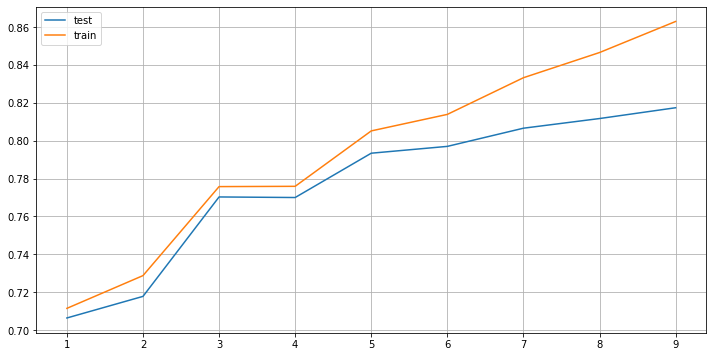

In [ ]:
xx=pd.DataFrame(index=[i[0] for i in x], data={'test': [i[1][0] for i in x], 'train': [i[1][1] for i in x]})
xx.plot.line(grid=True, figsize=(12, 6));

In [ ]:
xx.loc[6]

test     0.797001
train    0.813885
Name: 6, dtype: float64

In [ ]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)

print('Acciracy train score: {:.3f}'.format(round(metrics.accuracy_score(y_train, y_train_pred),3)))
print('Acciracy test score: {:.3f}'.format(round(metrics.accuracy_score(y_test, y_test_pred),3)))

Acciracy train score: 0.814
Acciracy test score: 0.797


### Задание 3

In [ ]:
# подберите оптимальные параметры с помощью gridsearch

grid = {'min_samples_split': [2, 5, 7, 10], 
        'max_depth': [3, 5, 7]}

grid_search = GridSearchCV(estimator=tree.DecisionTreeClassifier(random_state=42), param_grid=grid)  

%time grid_search.fit(X_train_scaled, y_train) 
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовой выборке: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))


CPU times: user 1.71 s, sys: 20.4 ms, total: 1.73 s
Wall time: 3.04 s
f1_score на тестовой выборке: 0.81
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [ ]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(criterion = 'gini',
                                     min_samples_leaf = 5,
                                     max_depth = 10,
                                     random_state=42)
rf.fit(X_train_scaled, y_train)
y_test_pred = rf.predict(X_test_scaled)

print('Accuracy(test): {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Recall(test): {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('f1_score на тестовой выборке: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

Accuracy(test): 0.84
Recall(test): 0.86
f1_score на тестовой выборке: 0.836
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1790
           1       0.81      0.86      0.84      1545

    accuracy                           0.84      3335
   macro avg       0.84      0.84      0.84      3335
weighted avg       0.85      0.84      0.84      3335



### Задание 2

In [ ]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом

gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42)

gb.fit(X_train_scaled, y_train)
y_test_pred = gb.predict(X_test_scaled)

print('Accuracy(test): {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print('Recall(test): {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))
print('f1_score на тестовой выборке: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

Accuracy(test): 0.85
Recall(test): 0.87
f1_score на тестовой выборке: 0.845
              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1790
           1       0.82      0.87      0.84      1545

    accuracy                           0.85      3335
   macro avg       0.85      0.85      0.85      3335
weighted avg       0.85      0.85      0.85      3335



### Ответ:

Если посмотреть известные вам метрики в целом, модель "Случайный лес" даёт более качественный прогноз.

### Задание3


In [ ]:
# объедините уже известные вам алгоритмы с помощью стекинга
estimators = [
    ('dt', tree.DecisionTreeClassifier(criterion='entropy', random_state=42)),
    ('rf', ensemble.RandomForestClassifier(random_state=42)),
    ('gb', ensemble.HistGradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=5, max_depth=5, random_state=42))
]

stack = ensemble.StackingClassifier(estimators=estimators, final_estimator=linear_model.LogisticRegression(solver='sag', max_iter=1000, random_state=42))

stack.fit(X_train_scaled, y_train)
y_test_pred = stack.predict(X_test_scaled)

print('Precision (test): {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('f1_score на тестовой выборке: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))
print(metrics.classification_report(y_test, y_test_pred))

Precision (test): 0.83
f1_score на тестовой выборке: 0.840
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1790
           1       0.83      0.86      0.84      1545

    accuracy                           0.85      3335
   macro avg       0.85      0.85      0.85      3335
weighted avg       0.85      0.85      0.85      3335



### Задание 4

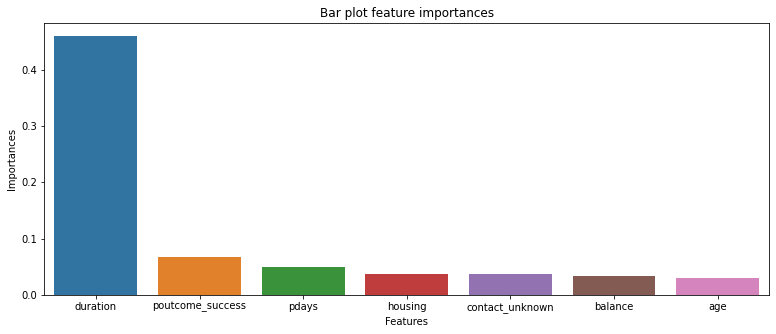

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))
feature = X.columns
feature_importances = rf.feature_importances_
imp = pd.DataFrame(index=X.columns, data=rf.feature_importances_, columns=['value']).sort_values(by='value', ascending=False)[:7]
sns.barplot(x=list(imp.index), y=imp.value, ax=ax)
ax.set_title('Bar plot feature importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');

###Ответ:
* Самым важным является признак duration, отражающий продолжительность контакта. Очевидно, что чем дольше идет разговор с представителем банка, тем выше вероясность убедить клиента
* Вторым по важности идет признак poutcome_success, показывающий результат прошлой маркетинговой камании. Данные говорят о том, что клиенты уже поучаствовавшие в кампании раньше, охотнее принимают решение относительно новой кампании
* Признак contact_unknown говорит о том, что контакт осуществлялся не по телефону (возможно в офисе банка или это особая группа клиентов), и это имеет тоже важное значение для целевой переменной

### Задание 5

### Установка пакета

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###.

In [ ]:
import optuna
# реализуйте оптимизацию гиперпараметров с помощью Optuna
print("Версия Optuna: {}".format(optuna.__version__))

Версия Optuna: 2.10.0


In [ ]:
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

In [ ]:
%%time
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

[I 2022-05-26 04:17:24,600] A new study created in memory with name: RandomForestClassifier
[I 2022-05-26 04:17:25,943] Trial 0 finished with value: 0.8810001543448063 and parameters: {'n_estimators': 143, 'max_depth': 18, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8810001543448063.
[I 2022-05-26 04:17:27,010] Trial 1 finished with value: 0.8838928241453649 and parameters: {'n_estimators': 114, 'max_depth': 28, 'min_samples_leaf': 7}. Best is trial 1 with value: 0.8838928241453649.
[I 2022-05-26 04:17:29,691] Trial 2 finished with value: 0.8913244828650818 and parameters: {'n_estimators': 200, 'max_depth': 26, 'min_samples_leaf': 6}. Best is trial 2 with value: 0.8913244828650818.
[I 2022-05-26 04:17:31,840] Trial 3 finished with value: 0.8848466163095421 and parameters: {'n_estimators': 142, 'max_depth': 22, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.8913244828650818.
[I 2022-05-26 04:17:34,087] Trial 4 finished with value: 0.8824888341290621 and parameters: {'n_

CPU times: user 32.3 s, sys: 150 ms, total: 32.4 s
Wall time: 40.8 s


In [ ]:
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 180, 'max_depth': 22, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.95


In [ ]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Accuracy на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.85
Accuracy на тестовом наборе: 0.85


###Ответ:
По сравнению с предыдущими моделями результат улучшился!

[EOF]